# Setup

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importing Libraries

In [10]:
train = pd.read_csv(r"C:\Users\KodavatiGeetanjali\Desktop\ML\titanic\train.csv")
test  = pd.read_csv(r"C:\Users\KodavatiGeetanjali\Desktop\ML\titanic\test.csv")

In [11]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# **Data Preprocessing**

In [13]:
print(train.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


# **Finding Relashionship**

# Survival by Sex

## for sex we clearly see that the women had a great advantage for Surviving,¶
## mostly because of the (women and children first) protocols that was used before

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64




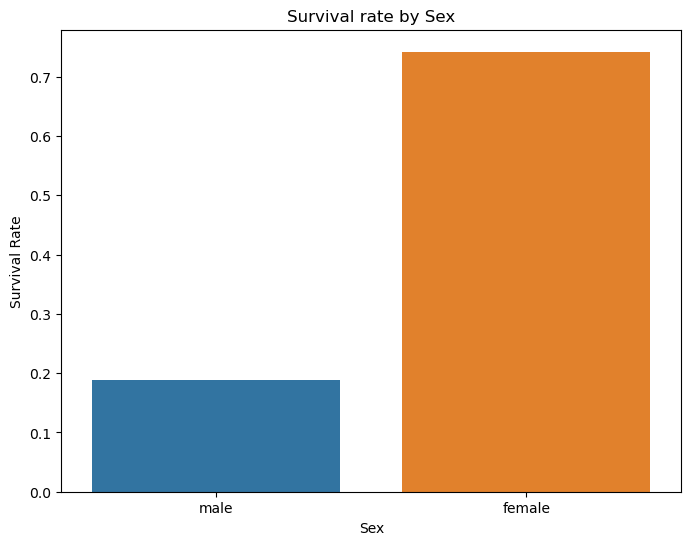

In [17]:
# Calculate survival rates by Sex
survival_by_sex = train.groupby('Sex')['Survived'].mean()
print(survival_by_sex)
print("\n")

#Plot survival rate by sex
plt.figure(figsize=(8,6))
sns.barplot(x='Sex', y='Survived', data=train, hue='Sex', errorbar=None)
plt.title('Survival rate by Sex')
plt.ylabel('Survival Rate')
plt.show()

## This stark difference highlights gender as a critical factor influencing survival.

# Survival rate by Age Group:

## Children (babies and young children) had notably higher survival rates, likely due to prioritization in lifeboat allocation.¶
## Adults and teenagers generally experienced lower survival rates, potentially reflecting the prioritization of vulnerable groups and physical limitations during evacuation.
## The significantly lower survival rate for older passengers (> 60 years) suggests challenges faced by elderly individuals in emergency evacuation scenarios.


In [21]:
train['AgeGroup'] = pd.cut(train['Age'], bins = [0,5,14, 18, 30, 60, 100], labels=['Baby', 'Child', 'Teenager', 'Adult', 'OldAdult', 'Old'])
survival_by_age = train.groupby('AgeGroup', observed=True)['Survived'].mean()

print("Survival rate by Age Group:")
print(survival_by_age)
print("\n")

Survival rate by Age Group:
AgeGroup
Baby        0.704545
Child       0.424242
Teenager    0.403226
Adult       0.355556
OldAdult    0.420495
Old         0.227273
Name: Survived, dtype: float64




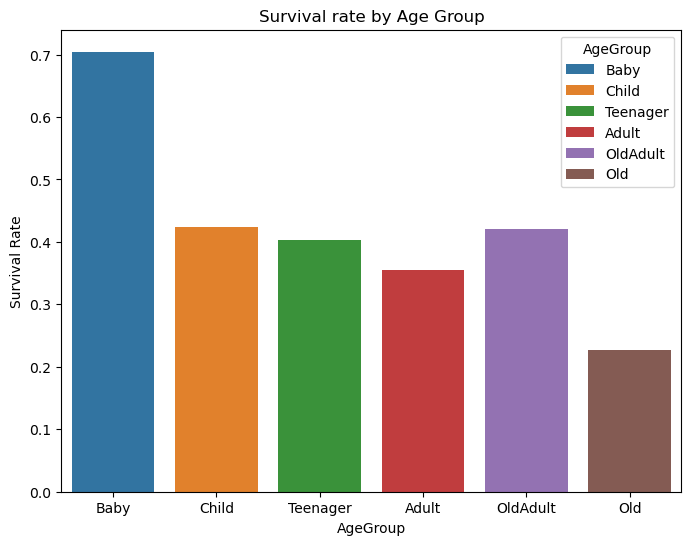

In [22]:
# #Plot survival rate by Age
plt.figure(figsize=(8,6))
sns.barplot(x='AgeGroup', y='Survived', data=train, errorbar=None, hue='AgeGroup', order=['Baby', 'Child', 'Teenager', 'Adult', 'OldAdult', 'Old'])
plt.title('Survival rate by Age Group')
plt.ylabel('Survival Rate')
plt.show()

# Survival by Pclass

## First-class passengers (62.96% survival rate) had higher survival rates, possibly due to their proximity to lifeboats and priority access during evacuation.¶
## Third-class passengers (24.24% survival rate) faced the lowest survival rates, likely due to their lower deck locations and delayed access to lifeboats.
## Passenger class serves as a proxy for socio-economic status, highlighting disparities in survival linked to wealth and access to resources during the Titanic disaster

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64




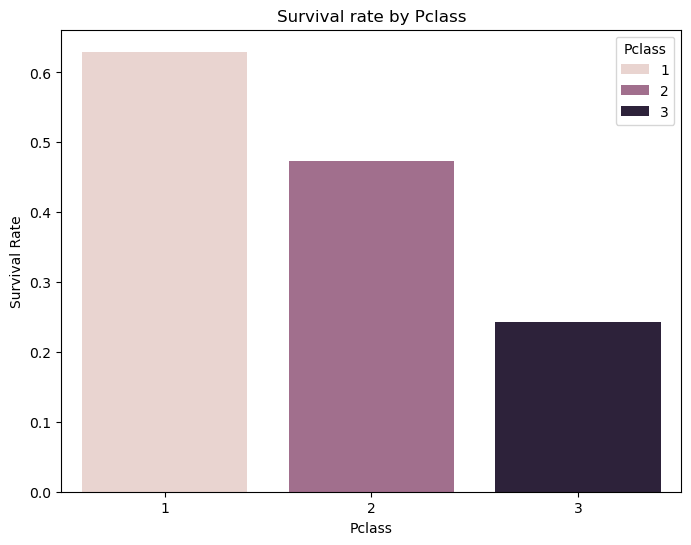

In [25]:
# Calculate survival rates by Pclass
survival_by_pclass = train.groupby('Pclass', observed=False)['Survived'].mean()
print(survival_by_sex)
print("\n")

#Plot survival rate by sex
plt.figure(figsize=(8,6))
sns.barplot(x='Pclass', y='Survived', data=train, hue='Pclass', errorbar=None)
plt.title('Survival rate by Pclass')
plt.ylabel('Survival Rate')
plt.show()

# Survival by Fare Group


## Passengers who paid higher fares (e.g., Very High and Luxury fare classes) had significantly higher survival rates, likely reflecting their accommodations closer to lifeboats and priority boarding.¶
## Conversely, passengers who paid lower fares (e.g., Very Low fare class) had a 0% survival rate, underscoring challenges faced by passengers in lower fare categories during the evacuation.
## Fare class serves as a proxy for passenger location on the ship and access to evacuation resources, illustrating its impact on survival outcomes.


In [28]:
train['FareClass'] = pd.cut(train['Fare'], bins = [0,5,15, 25, 50, 100, 250, float('inf')], labels=['Very Low', 'Low', 'Moderate', 'Medium', 'High', 'Very High', 'Luxury'])
survival_by_fare = train.groupby('FareClass', observed=True)['Survived'].mean()

print("Survival rate by Fare Group:")
print(survival_by_fare)
print("\n")

Survival rate by Fare Group:
FareClass
Very Low     0.000000
Low          0.256236
Moderate     0.464646
Medium       0.419540
High         0.654206
Very High    0.727273
Luxury       0.777778
Name: Survived, dtype: float64




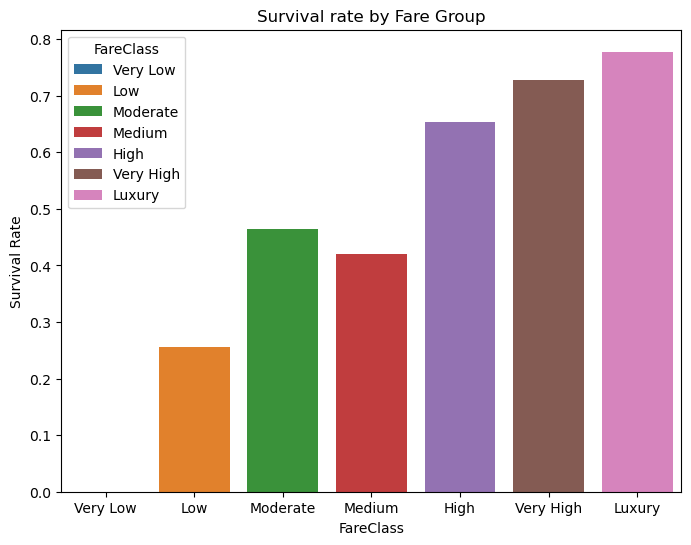

In [29]:
#Plot survival rate by fare
plt.figure(figsize=(8,6))
sns.barplot(x='FareClass', y='Survived', data=train, hue='FareClass', errorbar=None, order=['Very Low', 'Low', 'Moderate', 'Medium', 'High', 'Very High', 'Luxury'])
plt.title('Survival rate by Fare Group')
plt.ylabel('Survival Rate')
plt.show()

# Data Preprocessing and Feature Engineering:

## Handling Missing Values: Age and Fare: Missing age values were imputed using the K-Nearest Neighbors (KNN) approach, leveraging information from similar observations to fill in gaps in the dataset. Fare values missing due to rare occurrences were replaced with the median fare.

##    Embarked: Missing embarkation values were filled with the most frequent embarkation port recorded in the dataset.
##    Cabin: Cabin information, initially sparse, was simplified by mapping cabins to their first letter and filling missing values with 'N', indicating no cabin data.

##    Feature Engineering:

##    Family Size: Created a 'Family' feature by summing 'Parch' (number of parents/children aboard) and 'SibSp' (number of siblings/spouses aboard), providing insight into passenger family relationships.
##      Title Extraction: Extracted passenger titles (e.g., Mr., Mrs., Miss) from names, categorizing rare titles into a consolidated 'Rare' category and merging similar titles (e.g., 'Mlle' and 'Ms' into 'Miss').
##    Age and Fare Categorization: Binned age and fare values into discrete categories ('Baby', 'Child', 'Teenager', 'Adult', 'OldAdult', 'Old' for age; 'Very Low' to 'Luxury' for fare), allowing for categorical analysis of survival trends based on age and economic status.
##    Alone Status: Determined whether passengers traveled alone ('Alone') based on the absence of family members onboard.

##    One-Hot Encoding:

##    Transformed categorical variables such as 'Sex', 'Embarked', 'Title', and 'Cabin' into binary indicators using onehot encoding, facilitating the incorporation of categorical data into machine learning models without imposing ordinality.

##    Feature Selection and Scaling:

##    Selected relevant features including demographic attributes ('Age', 'Sex', 'Pclass'), family information ('Family', 'Alone'), socio-economic indicators ('Fare', 'Title'), and cabin categories.
##    Scaled numeric features ('Age', 'Fare', 'Parch', 'SibSp') using standard scaling to normalize data distributions and ensure all features contribute equally to model training.

In [32]:
train['Title'] = train['Name'].str.extract('([A-Za-z]+)\\.', expand=False)
print(train['Title'].value_counts())

Title
Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: count, dtype: int64


In [49]:
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler

def data_preprocessing(df):

    df['Family'] = df['Parch'] + df['SibSp']
    
    # Extract titles from names
    df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\\.', expand=False)
    df['Title'] = df['Title'].replace(['Lady', 'Countess', 'Capt', 'Col', 'Don', 
                                       'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    df['Title'] = df['Title'].replace('Mlle', 'Miss')
    df['Title'] = df['Title'].replace('Ms', 'Miss')
    df['Title'] = df['Title'].replace('Mme', 'Mrs')

    # Fill missing embarked with the most frequent value
    df.fillna({'Embarked' : df['Embarked'].mode()[0]}, inplace=True)

    # Fill missing fare with the median
    df.fillna({'Fare' : df['Fare'].median()}, inplace=True)

    # Create fare classes
    df['Very Low'] = (df['Fare'] <= 4)
    df['Low'] = (df['Fare'] > 4) & (df['Fare'] <= 15)
    df['Moderate'] = (df['Fare'] > 15) & (df['Fare'] <= 25)
    df['Medium'] = (df['Fare'] > 25) & (df['Fare'] <= 50)
    df['High'] = (df['Fare'] > 50) & (df['Fare'] <= 100)
    df['Very High'] = (df['Fare'] > 100) & (df['Fare'] <= 250)
    df['Luxury'] = (df['Fare'] > 250)

    # Convert cabin to first letter and fill missing values with 'N'
    df['Cabin'] = df['Cabin'].fillna('N').map(lambda x: x[0])
    
    # Fill missing age with the median or using KNN Imputer
    age_imputer = KNNImputer(n_neighbors=5)
    df['Age'] = age_imputer.fit_transform(df[['Age']])
    
    # Create age categories
    df['Baby'] = (df['Age'] <= 5)
    df['Child'] = (df['Age'] > 5) & (df['Age'] <= 14)
    df['Teenager'] = (df['Age'] > 14) & (df['Age'] <= 18)
    df['Adult'] = (df['Age'] > 18) & (df['Age'] <= 30)
    df['OldAdult'] = (df['Age'] > 30) & (df['Age'] <= 60)
    df['Old'] = (df['Age'] > 60)
    df['Alone'] = df['Family'] == 0
    
    # One-hot encoding
    df = pd.get_dummies(df, columns=['Sex', 'Embarked', 'Title', 'Cabin'], drop_first=True)
    #in case there is a cabin that was not mentioned, create it and fill it with False
    for l in ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'T']:
        col = f'Cabin_{l}'
        if col not in df.columns:
            df[col] = pd.Series([False]*df.shape[0])
            df.fillna({'col': False}, inplace=True)
    
    # Select relevant columns
    cols = ['Age', 'Fare', 'Family', 'Parch', 'SibSp', 'Alone', 'Pclass', 'Very Low', 'Low', 'Moderate', 'Medium',
       'High', 'Very High', 'Luxury', 'Baby', 'Child', 'Teenager',
       'Adult', 'OldAdult', 'Old', 'Sex_male',
       'Embarked_Q', 'Embarked_S', 'Title_Miss', 'Title_Mr', 'Title_Mrs',
       'Title_Rare', 'Cabin_A', 'Cabin_B', 'Cabin_C', 'Cabin_D', 'Cabin_E', 'Cabin_F',
       'Cabin_G', 'Cabin_T'] #Cabin_N was ignored
    df2 = df[cols].copy()
    
    # Scale numeric features
    numeric_features = ['Age', 'Fare', 'Parch', 'SibSp']
    scaler = StandardScaler()
    df2[numeric_features] = scaler.fit_transform(df2[numeric_features])
    
    return df2

In [51]:
# Perform data preprocessing and feature engineering (assuming you've already done this)
train_processed = data_preprocessing(train)

# Define features and target variable
X = train_processed
y = train['Survived']

# Train Test Split

In [56]:
from sklearn.model_selection import train_test_split

# Split the data into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [34]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


# **Build Models**

In [60]:
# apply all single  (Logistic regression,  KNN, Naive bayies, SVM, Decision tree), ensemble (RF, Extratrees, bagging m XGBoosting , gradient boosting , adaboost , voting , and stacking) ML models usign grid search

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold
from sklearn.metrics import accuracy_score, classification_report

# Single Models
models = {
    'Logistic Regression': LogisticRegression(),
    'KNN': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    'SVM': SVC(),
    'Decision Tree': DecisionTreeClassifier()
}

# Ensemble Models
ensemble_models = {
    'Random Forest': RandomForestClassifier(),
    'Extra Trees': ExtraTreesClassifier(),
    'Bagging': BaggingClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'XGBoost': XGBClassifier()
}

# Hyperparameter Grids (Example - Customize for each model)
param_grids = {
    'Logistic Regression': {'C': [0.1, 1, 10]},
    'KNN': {'n_neighbors': [3, 5, 7]},
    'Naive Bayes': {}, # Add an empty dictionary for Naive Bayes since it doesn't usually require hyperparameter tuning
    'SVM': {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']},
    'Decision Tree': {'max_depth': [None, 5, 10]},
    'Random Forest': {'n_estimators': [50, 100, 200]},
    'Extra Trees': {'n_estimators': [50, 100, 200]},
    'Bagging': {'n_estimators': [10, 20, 30]},
    'AdaBoost': {'n_estimators': [50, 100, 200]},
    'Gradient Boosting': {'n_estimators': [50, 100, 200]},
    'XGBoost': {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 0.2]}
}

# Cross-validation strategy
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [111]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

X_train_scaled = StandardScaler().fit_transform(X_train)
X_test_scaled  = StandardScaler().fit(X_test)

results = [] 

# Model Evaluation and Selection
best_models = {}
for name, model in models.items():
    grid_search = GridSearchCV(model, param_grids[name], cv=cv, scoring='accuracy')
    grid_search.fit(X_train_scaled, y_train)
    best_models[name] = grid_search.best_estimator_
    print(f"{name}: Best Parameters - {grid_search.best_params_}, Best Score - {grid_search.best_score_}")

for name, model in ensemble_models.items():
    grid_search = GridSearchCV(model, param_grids[name], cv=cv, scoring='accuracy')
    grid_search.fit(X_train_scaled, y_train)
    best_models[name] = grid_search.best_estimator_
    print(f"{name}: Best Parameters - {grid_search.best_params_}, Best Score - {grid_search.best_score_}")
    results.append({'Model': name, 'Best Parameters': grid_search.best_params_, 'Best Score': grid_search.best_score_})

Logistic Regression: Best Parameters - {'C': 10}, Best Score - 0.8216586230670739
KNN: Best Parameters - {'n_neighbors': 7}, Best Score - 0.776716241504974
Naive Bayes: Best Parameters - {}, Best Score - 0.5923470895301881
SVM: Best Parameters - {'C': 10, 'kernel': 'linear'}, Best Score - 0.8258938244853737
Decision Tree: Best Parameters - {'max_depth': 5}, Best Score - 0.8047572146163695
Random Forest: Best Parameters - {'n_estimators': 100}, Best Score - 0.8146853146853147
Extra Trees: Best Parameters - {'n_estimators': 200}, Best Score - 0.8006008076430613
Bagging: Best Parameters - {'n_estimators': 10}, Best Score - 0.8315473259135231
AdaBoost: Best Parameters - {'n_estimators': 200}, Best Score - 0.8048064611444893
Gradient Boosting: Best Parameters - {'n_estimators': 100}, Best Score - 0.8357135821924555
XGBoost: Best Parameters - {'learning_rate': 0.1, 'n_estimators': 50}, Best Score - 0.834295282182606


In [119]:
results_df = pd.DataFrame(results)
print(results_df.sort_values(by='Best Score'))

               Model                             Best Parameters  Best Score
1        Extra Trees                       {'n_estimators': 200}    0.800601
3           AdaBoost                       {'n_estimators': 200}    0.804806
0      Random Forest                       {'n_estimators': 100}    0.814685
2            Bagging                        {'n_estimators': 10}    0.831547
5            XGBoost  {'learning_rate': 0.1, 'n_estimators': 50}    0.834295
4  Gradient Boosting                       {'n_estimators': 100}    0.835714


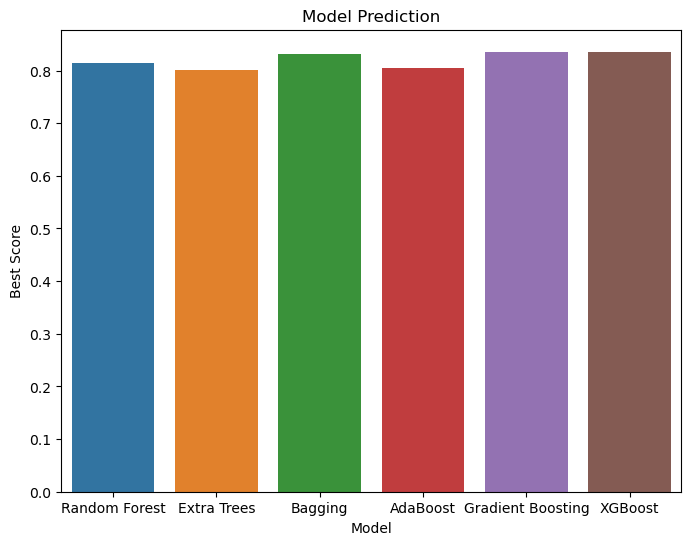

In [129]:
#Plot results
plt.figure(figsize=(8,6))
sns.barplot(x='Model', y='Best Score', data=results_df, hue='Model', errorbar=None)
plt.title('Model Prediction')
plt.ylabel('Best Score')
plt.show()

In [123]:
from sklearn.metrics import confusion_matrix

# Predict using the best Voting model
y_pred = best_models['Gradient Boosting'].predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, digits=4)
matrix = confusion_matrix(y_test, y_pred)

# Print the results
print(f"--- Voting Classifier ---")
print(f"Accuracy: {accuracy:.4f}")
print(f"Classification Report:\n{report}")
print(f"Confusion Matrix:\n{matrix}")

--- Voting Classifier ---
Accuracy: 0.6145
Classification Report:
              precision    recall  f1-score   support

           0     0.6124    1.0000    0.7596       109
           1     1.0000    0.0143    0.0282        70

    accuracy                         0.6145       179
   macro avg     0.8062    0.5071    0.3939       179
weighted avg     0.7640    0.6145    0.4736       179

Confusion Matrix:
[[109   0]
 [ 69   1]]


In [131]:
from sklearn.metrics import confusion_matrix

# Predict using the best Voting model
y_pred = best_models['XGBoost'].predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, digits=4)
matrix = confusion_matrix(y_test, y_pred)

# Print the results
print(f"--- Voting Classifier ---")
print(f"Accuracy: {accuracy:.4f}")
print(f"Classification Report:\n{report}")
print(f"Confusion Matrix:\n{matrix}")

--- Voting Classifier ---
Accuracy: 0.6816
Classification Report:
              precision    recall  f1-score   support

           0     0.6757    0.9174    0.7782       109
           1     0.7097    0.3143    0.4356        70

    accuracy                         0.6816       179
   macro avg     0.6927    0.6159    0.6069       179
weighted avg     0.6890    0.6816    0.6442       179

Confusion Matrix:
[[100   9]
 [ 48  22]]
